<a href="https://colab.research.google.com/github/AnberAziz/BS-DS-Project/blob/main/Week8Anber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

print("--- Please upload your 'kaggle.json' file ---")
# This will prompt you to upload the kaggle.json file
files.upload()

--- Please upload your 'kaggle.json' file ---


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anberaziz","key":"51b0632a958ba40eb6e93d29e8ea615c"}'}

In [2]:
# -----------------------------------------------------------------------
# Part 1 & 2: Setup, Download, and Clean Data (from Weeks 1-6)
# -----------------------------------------------------------------------
print("--- Part 1 & 2: Setting up, Downloading, and Cleaning Data ---")

# 1. Install Kaggle and set up
!pip install kaggle scikit-learn -q
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d aljarah/xAPI-Edu-Data -q
!unzip -oq xAPI-Edu-Data.zip
print("Kaggle setup and data download complete.")

# 2. Load Libraries (NEW LIBRARIES ADDED FOR WEEK 8)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# -- NEW LIBRARIES FOR UNSUPERVISED (Week 8) --
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

print("All libraries imported.")

# 3. Load and Clean Data
df = pd.read_csv('xAPI-Edu-Data.csv')
df_cleaned = df.copy()

# Rename columns
df_cleaned.rename(columns={
    'gender': 'gender', 'NationalITy': 'nationality', 'PlaceofBirth': 'place_of_birth',
    'StageID': 'stage_id', 'GradeID': 'grade_id', 'SectionID': 'section_id',
    'Topic': 'topic', 'Semester': 'semester', 'Relation': 'relation',
    'raisedhands': 'raised_hands', 'VisITedResources': 'visited_resources',
    'AnnouncementsView': 'announcements_view', 'Discussion': 'discussion',
    'ParentAnsweringSurvey': 'parent_answering_survey',
    'ParentschoolSatisfaction': 'parent_school_satisfaction',
    'StudentAbsenceDays': 'student_absence_days', 'Class': 'class_label'
}, inplace=True)

# Drop duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Encode binary features
df_cleaned['student_absence_days'] = df_cleaned['student_absence_days'].map({'Under-7': 0, 'Above-7': 1})
df_cleaned['parent_answering_survey'] = df_cleaned['parent_answering_survey'].map({'Yes': 1, 'No': 0})
df_cleaned['parent_school_satisfaction'] = df_cleaned['parent_school_satisfaction'].map({'Good': 1, 'Bad': 0})
df_cleaned['gender'] = df_cleaned['gender'].map({'M': 1, 'F': 0})
print("Encoded binary features.")

--- Part 1 & 2: Setting up, Downloading, and Cleaning Data ---
Dataset URL: https://www.kaggle.com/datasets/aljarah/xAPI-Edu-Data
License(s): CC-BY-SA-4.0
Kaggle setup and data download complete.
All libraries imported.
Encoded binary features.


In [3]:
# -----------------------------------------------------------------------
# Part 3: Week 6 - Feature Engineering
# -----------------------------------------------------------------------
print("\n--- Part 3: Feature Engineering (One-Hot Encoding) ---")

categorical_features = [
    'nationality', 'place_of_birth', 'stage_id', 'grade_id',
    'section_id', 'topic', 'semester', 'relation'
]
df_processed = pd.get_dummies(df_cleaned, columns=categorical_features, drop_first=True)
print(f"Data shape after One-Hot Encoding: {df_processed.shape}")


--- Part 3: Feature Engineering (One-Hot Encoding) ---
Data shape after One-Hot Encoding: (478, 61)


In [4]:
# -----------------------------------------------------------------------
# Part 4: Week 8 - Unsupervised Learning
# -----------------------------------------------------------------------
print("\n--- Part 4: Week 8 Unsupervised Learning ---")

# 1. Prepare Data for Unsupervised Learning
# We use all features (X). We will just 'drop' the class label.
X = df_processed.drop('class_label', axis=1)
# We keep the true labels (y) for our final comparison plot.
y_true_labels = df_processed['class_label']

# 2. Scale the Data (CRITICAL for PCA and K-Means)
print("Scaling data using StandardScaler...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA (Class Task & Assignment)
print("Reducing data to 2 dimensions using PCA...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(f"Original feature count: {X_scaled.shape[1]}, Reduced feature count: {X_pca.shape[1]}")

# 4. Apply K-Means Clustering (Class Task & Assignment)
# We choose 3 clusters to see if it matches our 3 performance classes (L, M, H)
print("Applying K-Means clustering with k=3...")
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

# 5. Create a DataFrame for plotting
df_plot = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_plot['kmeans_cluster'] = cluster_labels
df_plot['true_label'] = y_true_labels.values
print("PCA and K-Means complete. Ready for visualization.")


--- Part 4: Week 8 Unsupervised Learning ---
Scaling data using StandardScaler...
Reducing data to 2 dimensions using PCA...
Original feature count: 60, Reduced feature count: 2
Applying K-Means clustering with k=3...
PCA and K-Means complete. Ready for visualization.



--- Part 5: Week 8 Visualization (Assignment 8) ---

[Plot 1: PCA Results, Colored by K-Means Cluster]


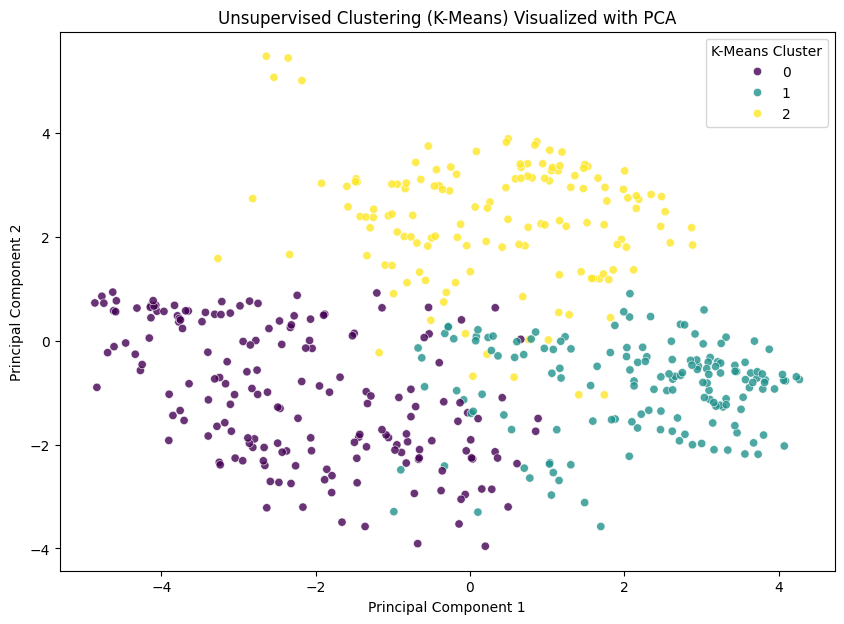


[Plot 2: PCA Results, Colored by True Performance Label]


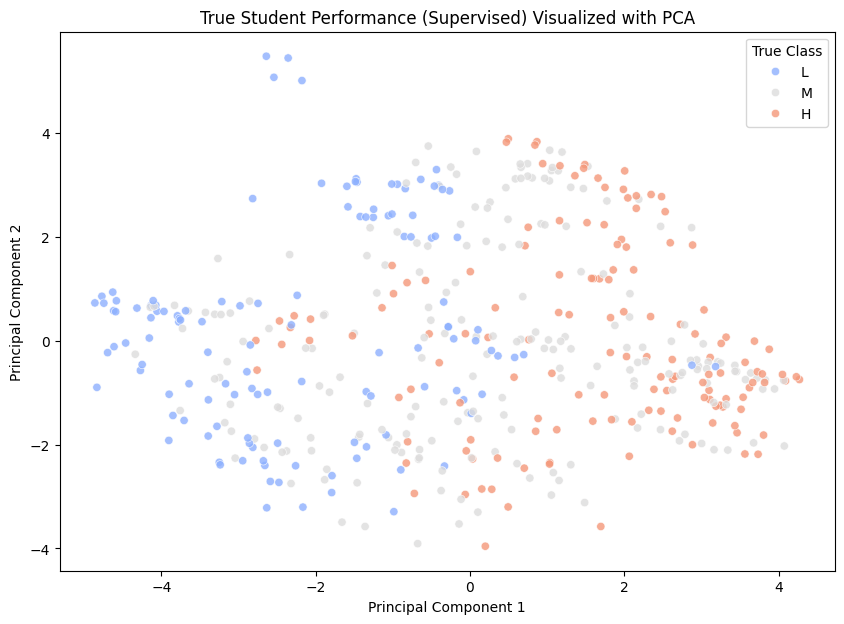


--- Analysis ---
Compare the two plots.
Plot 1 shows the groups the K-Means algorithm *found* on its own.
Plot 2 shows the *actual* student performance groups.
Do the cluster groups (e.g., Cluster 0) match the true label groups (e.g., 'L')?

--- Week 8 Complete! ---


In [5]:
# -----------------------------------------------------------------------
# Part 5: Week 8 - Visualization
# -----------------------------------------------------------------------
print("\n--- Part 5: Week 8 Visualization (Assignment 8) ---")

# --- Plot 1: Visualization by K-Means Cluster (Assignment Requirement) ---
print("\n[Plot 1: PCA Results, Colored by K-Means Cluster]")
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_plot,
    x='PC1',
    y='PC2',
    hue='kmeans_cluster',
    palette='viridis',
    alpha=0.8
)
plt.title('Unsupervised Clustering (K-Means) Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='K-Means Cluster')
plt.show()

# --- Plot 2: Visualization by True Labels (For Analysis) ---
print("\n[Plot 2: PCA Results, Colored by True Performance Label]")
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_plot,
    x='PC1',
    y='PC2',
    hue='true_label',
    hue_order=['L', 'M', 'H'],
    palette='coolwarm',
    alpha=0.8
)
plt.title('True Student Performance (Supervised) Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='True Class')
plt.show()

print("\n--- Analysis ---")
print("Compare the two plots.")
print("Plot 1 shows the groups the K-Means algorithm *found* on its own.")
print("Plot 2 shows the *actual* student performance groups.")
print("Do the cluster groups (e.g., Cluster 0) match the true label groups (e.g., 'L')?")
print("\n--- Week 8 Complete! ---")